In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/facial/training.csv')
# 결측값 전부 지우고
df.dropna(inplace=True)
df.shape

(2140, 31)

### npstack
- 사용자가 지정한 차원(축으로) 배열을 연결
- axis = 0(defalut) 가장 앞쪽에 차원 생성
- 배열 두 개가 겹치게 됨(연결하고자 축을 기준으로 할때 행을 기준으롷라면 행의 길이가, 열을 기준으로하면 열의 길이가 같아야 함)
https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/

In [2]:
from joblib import Parallel, delayed
# pip install joblib
def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype = np.uint8).reshape(96,96)

# 분산처리 작업
with Parallel(n_jobs=10, verbose=1, prefer ='threads') as ex:
    # Image column을 분리해서 list로 만들고 np.array로 바꿈
    x = ex(delayed(format_img)(e) for e in df.Image)
x = np.stack(x)[:,:,:,None]
print(x.shape)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:    3.4s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:    5.0s


(2140, 96, 96, 1)


[Parallel(n_jobs=10)]: Done 2140 out of 2140 | elapsed:    6.0s finished


In [3]:
y = df.iloc[:, :-1].values
y.shape

(2140, 30)

### np.split
- 배열을 여러개의 하위배열로 분리
- np.split(, axis =0)이면 행으로 분리 vsplit으로 생각
- np.split(, axis =1)이면 열로 분리 hsplit으로 생각
- np.vsplit : 수직 축으로 배열 분할  
https://rfriend.tistory.com/359

In [4]:
np.stack(np.split(y[0], 15, axis = 0), axis = 0).T

array([[66.03356391, 30.22700752, 59.58207519, 73.13034586, 36.35657143,
        23.45287218, 56.95326316, 80.22712782, 40.22760902, 16.35637895,
        44.42057143, 61.19530827, 28.61449624, 43.3126015 , 43.13070677],
       [39.00227368, 36.4216782 , 39.64742256, 39.96999699, 37.3894015 ,
        37.3894015 , 29.03364812, 32.22813835, 29.0023218 , 29.64747068,
        57.06680301, 79.97016541, 77.38899248, 72.93545865, 84.48577444]])

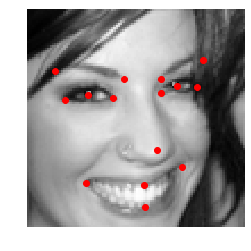

In [5]:
def show(x, y=None):
    plt.imshow(x[:,:,0], 'gray')
    if y is not None:
        # vertical stack 
        points = np.stack(np.split(y, 15, axis = 0),axis =0).T
        plt.plot(points[0], points[1],'o', color = 'red')
    plt.axis('off')
sample_idx = np.random.choice(len(x))
show(x[sample_idx], y[sample_idx])

### train_test_split
- 교차검증을 위한 다양한 명령 제공
https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/

In [6]:

from sklearn.model_selection import train_test_split

# random_state는 난수시드
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, random_state = 42)
print("x_train.shape :{}\nx_val.shape : {}".format(x_train.shape, x_val.shape))
print("y_train.shape :{}\ny_val.shape : {}".format(y_train.shape, y_val.shape))

x_train.shape :(1712, 96, 96, 1)
x_val.shape : (428, 96, 96, 1)
y_train.shape :(1712, 30)
y_val.shape : (428, 30)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 데이터 정규화
x_train_norm = x_train[:,:,:,:]
x_val_norm = x_val[:,:,:,:]
x_train_norm = x_train_norm.reshape([-1, 96*96])
x_val_norm = x_val_norm.reshape([-1,96*96])
print("x_train_norm.shape : {}".format(x_train_norm.shape))
print("x_val_norm,.shape : {}".format(x_val_norm.shape))

x_train_norm = scaler.fit_transform(x_train_norm)
x_val_norm = scaler.fit_transform(x_val_norm)
print("x_train_norm.mean : {}".format(x_train_norm.mean()))
print("x_train_norm.std : {}".format(x_train_norm.std()))


x_train_norm.shape : (1712, 9216)
x_val_norm,.shape : (428, 9216)


C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


x_train_norm.mean : 0.4752519194072296
x_train_norm.std : 0.23269733883088617


In [8]:
x_train_norm = x_train_norm.reshape([-1,96,96,1])
x_val_norm = x_val_norm.reshape([-1,96,96,1])
print("x_train_norm.shape : {}".format(x_train_norm.shape))
print("x_val_norm,.shape : {}".format(x_val_norm.shape))


x_train_norm.shape : (1712, 96, 96, 1)
x_val_norm,.shape : (428, 96, 96, 1)


### keras model
- pip install Keras
- Sequential model
    - Conv2D
    - AvgPool2D
    - BatchNormalization
    - Flatten
    - Dropout
    - Dense
- model.compile
    - Adam, mse, 

### L1, L2정규화 / 배치정규화
- L1 정규화
    - 모델 가중치의 L1 norm(가중치의 각 요소 절대값의 합)에 대해 패널티를 부과
        - 불필요한 피처에 대응하는 가중치들을 0으로 만듬
        - 변수 선택효과
        - L2 정규화와 대조
- L2 정규화
    - 모델 가중치의 L2 norm(가중치 각 요소 제곱의 합)에 대해 패널티를 부과
        - 아주 큰 값이나 작은 값을 가지는 outlier 모델 가중치에 대해 0에 가깝지만 0은 아닌 값으로 만듬
        - L1 정규화와 대조

https://ratsgo.github.io/machine%20learning/2017/10/12/terms/ 

https://datascienceschool.net/view-notebook/f18248a467e94c6483783afc93d08af9/

### metrics
- 모델의 성능을 판단하는데 사용되는 함수
- 메트릭을 평가한 결과가 사용되지 않는다는 점을 제외하면 손실함수와 유사  
https://keras.io/metrics/

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras import regularizers

Using TensorFlow backend.


In [24]:
model = Sequential()
# 첫번째 layer는 input_shape을 줘야함
# filter, kernel size, activation, initializers(he_normal은 정규분포로 부터 표본)
model.add(Conv2D(72, (4,4), input_shape = (96,96,1), activation ='relu', kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(48, (2,2), activation ='relu', use_bias = False,  kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(48, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(30, kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
# mae(Mean Absolute Error)
model.compile(optimizer = Adam(0.01), loss='mse', metrics=['mae'])


In [25]:
model.summary(), model.input, model.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 93, 93, 72)        1224      
_________________________________________________________________
average_pooling2d_3 (Average (None, 46, 46, 72)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 48)        13824     
_________________________________________________________________
batch_normalization_3 (Batch (None, 45, 45, 48)        192       
_________________________________________________________________
flatten_3 (Flatten)          (None, 97200)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 97200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 48)                4665648   
__________

(None,
 <tf.Tensor 'conv2d_5_input:0' shape=(?, 96, 96, 1) dtype=float32>,
 <tf.Tensor 'dense_4/BiasAdd:0' shape=(?, 30) dtype=float32>)

In [10]:
from keras.layers import MaxPooling2D
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape = (96,96,1), activation ='relu',  use_bias = False, kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Conv2D(32, (3,3), activation ='relu', use_bias = False,  kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64, (3,3), activation ='relu', use_bias = False,  kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Conv2D(64, (3,3), activation ='relu', use_bias = False,  kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.01)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(256, activation='relu',use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(30, use_bias  = True, kernel_initializer = 'he_normal',bias_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
# mae(Mean Absolute Error)
model2.compile(optimizer = Adam(0.01), loss='mse', metrics=['mae'])


In [11]:
model2.summary(), model2.input, model2.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 32)        9216      
_________________________________________________________________
dropout_2 (Dropout)          (None, 92, 92, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18432     
_________________________________________________________________
dropout_3 (Dropout)          (None, 44, 44, 64)        0         
__________

(None,
 <tf.Tensor 'conv2d_1_input:0' shape=(?, 96, 96, 1) dtype=float32>,
 <tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 30) dtype=float32>)

In [ ]:
log2 = model2.fit(x_train_norm, y_train, epochs = 100, batch_size = 20, validation_data= [x_val_norm,y_val])

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 42s 25ms/step - loss: 17249.5138 - mean_absolute_error: 39.9525 - val_loss: 2690.1001 - val_mean_absolute_error: 46.8293
Epoch 2/100
1712/1712 [==============================] - 36s 21ms/step - loss: 618.8679 - mean_absolute_error: 16.9191 - val_loss: 2642.1839 - val_mean_absolute_error: 46.5750
Epoch 3/100
1712/1712 [==============================] - 36s 21ms/step - loss: 623.1351 - mean_absolute_error: 17.2881 - val_loss: 2607.9664 - val_mean_absolute_error: 46.3913
Epoch 4/100
1712/1712 [==============================] - 37s 21ms/step - loss: 578.0797 - mean_absolute_error: 16.6818 - val_loss: 2575.4963 - val_mean_absolute_error: 46.1955
Epoch 5/100
1712/1712 [==============================] - 37s 22ms/step - loss: 641.0676 - mean_absolute_error: 18.2368 - val_loss: 2408.1783 - val_mean_absolute_error: 44.6668
Epoch 6/100
1712/1712 [==============================] - 37s 21ms/step 

### gpu 돌아가고있는지 확인
- nvidia gpu tillization 통해 사용량 확인
https://winandlinux.tistory.com/19
- python code에서 확인  
https://rfriend.tistory.com/425

In [27]:
log = model.fit(x_train_norm, y_train, epochs = 150, batch_size = 20, validation_data= [x_val_norm,y_val])

Train on 1712 samples, validate on 428 samples
Epoch 1/150
1712/1712 [==============================] - 22s 13ms/step - loss: 391.8101 - mean_absolute_error: 9.7220 - val_loss: 687.2223 - val_mean_absolute_error: 20.7953
Epoch 2/150
1712/1712 [==============================] - 20s 12ms/step - loss: 96.0432 - mean_absolute_error: 4.2845 - val_loss: 298.9723 - val_mean_absolute_error: 12.3382
Epoch 3/150
1712/1712 [==============================] - 20s 12ms/step - loss: 56.7096 - mean_absolute_error: 2.6727 - val_loss: 115.4599 - val_mean_absolute_error: 6.9640
Epoch 4/150
1712/1712 [==============================] - 20s 12ms/step - loss: 47.6748 - mean_absolute_error: 2.8326 - val_loss: 108.3475 - val_mean_absolute_error: 7.6053
Epoch 5/150
1712/1712 [==============================] - 20s 12ms/step - loss: 36.5003 - mean_absolute_error: 2.5257 - val_loss: 85.8175 - val_mean_absolute_error: 6.9328
Epoch 6/150
1712/1712 [==============================] - 20s 12ms/step - loss: 29.9045 - me

1712/1712 [==============================] - 20s 12ms/step - loss: 9.8291 - mean_absolute_error: 1.9283 - val_loss: 8.9787 - val_mean_absolute_error: 1.7672
Epoch 49/150
1712/1712 [==============================] - 20s 12ms/step - loss: 9.0988 - mean_absolute_error: 1.8076 - val_loss: 8.4107 - val_mean_absolute_error: 1.6566
Epoch 50/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.5880 - mean_absolute_error: 1.7536 - val_loss: 8.5842 - val_mean_absolute_error: 1.7406
Epoch 51/150
1712/1712 [==============================] - 20s 12ms/step - loss: 15.8740 - mean_absolute_error: 2.3790 - val_loss: 24.9602 - val_mean_absolute_error: 2.7082
Epoch 52/150
1712/1712 [==============================] - 20s 12ms/step - loss: 16.6503 - mean_absolute_error: 2.2346 - val_loss: 12.2491 - val_mean_absolute_error: 1.9616
Epoch 53/150
1712/1712 [==============================] - 20s 12ms/step - loss: 12.3710 - mean_absolute_error: 2.1705 - val_loss: 10.8753 - val_mean_absolute_e

Epoch 96/150
1712/1712 [==============================] - 20s 12ms/step - loss: 9.5262 - mean_absolute_error: 1.9242 - val_loss: 9.8142 - val_mean_absolute_error: 1.9670
Epoch 97/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.9274 - mean_absolute_error: 1.8366 - val_loss: 9.0739 - val_mean_absolute_error: 1.9030
Epoch 98/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.9610 - mean_absolute_error: 1.8711 - val_loss: 8.6072 - val_mean_absolute_error: 1.7575
Epoch 99/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.6904 - mean_absolute_error: 1.8158 - val_loss: 7.7401 - val_mean_absolute_error: 1.6417
Epoch 100/150
1712/1712 [==============================] - 21s 12ms/step - loss: 9.0635 - mean_absolute_error: 1.8903 - val_loss: 9.0770 - val_mean_absolute_error: 1.8967
Epoch 101/150
1712/1712 [==============================] - 20s 12ms/step - loss: 9.0557 - mean_absolute_error: 1.8814 - val_loss: 12.0358 - val_mean_

Epoch 144/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.8252 - mean_absolute_error: 1.8483 - val_loss: 9.3968 - val_mean_absolute_error: 1.9317
Epoch 145/150
1712/1712 [==============================] - 20s 12ms/step - loss: 9.1353 - mean_absolute_error: 1.8885 - val_loss: 8.9972 - val_mean_absolute_error: 1.7442
Epoch 146/150
1712/1712 [==============================] - 20s 12ms/step - loss: 9.0922 - mean_absolute_error: 1.8816 - val_loss: 9.3034 - val_mean_absolute_error: 1.9654
Epoch 147/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.9370 - mean_absolute_error: 1.8915 - val_loss: 10.9169 - val_mean_absolute_error: 2.2283
Epoch 148/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.7150 - mean_absolute_error: 1.8281 - val_loss: 8.0257 - val_mean_absolute_error: 1.6964
Epoch 149/150
1712/1712 [==============================] - 20s 12ms/step - loss: 8.9409 - mean_absolute_error: 1.8711 - val_loss: 9.4754 - val_m

In [282]:
from keras.models import load_model

model.save('model1.h5')
# model = load_model('model1_h5')



### log
- loss : 매 epoch마다의 훈련 손실 값
- acc : 매 epoch마다의 훈련 정확도
- val_loss : 매 epoch마다의 검증 손실값
- val_acc : 매 epoch마다의 검증 정확도  
https://tykimos.github.io/2017/07/09/Training_Monitoring/

In [55]:
print(log.history['loss'][0:5])

[391.81008321102536, 96.04319822008365, 56.70964304309025, 47.67478689746322, 36.50026316063426]


In [60]:
log.history['loss'][1]

96.04319822008365

In [73]:
def show_results(*logs):
    trn_loss, val_loss, trn_acc, val_acc = [],[],[],[]
    
    for log in logs:
        trn_loss += log.history['loss']
        val_loss += log.history['val_loss']
        
    fig, ax = plt.subplots(figsize = (8,4))
    # loss value
    ax.plot(trn_loss, label = 'train')
    # accuracy
    ax.plot(val_loss, label = 'validation')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend()

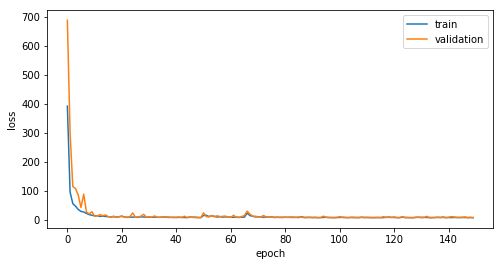

In [74]:
show_results(log)

### np none slicing
- 축을 하나 추가해주는거정도로 생각

In [211]:
np.stack(np.split(test[0], 15, axis = 0), axis = 0).shape

(15, 2)

In [245]:
def show_pred(x, y_real, y_pred):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    for ax in axes:
        # (96,96)
        ax.imshow(x[0,:,:, 0], 'gray')
        ax.axis('off')
    # y_real[0] 을 배열로 분리하는데 인자로 15를 줬기때문에
    # list len이 15인 형태로 분리
    # axis = 0 은 행을 축으로 분리
    # 위에 값을 인자로 넣어 stack 함
    # list의 구조인데 각 요소는 np.array이고 sahpe은 (2,0)
    # 배열을 연결하는데 행을 축으로 연결하기 때문에 각 행을 축으로 쌓임 (15,2)
    # 그리고 마지막으로 전치행렬 (2,15)
    points_real = np.stack(np.split(y_real[0], 15, axis = 0)).T
    points_pred = np.stack(np.split(y_pred[0], 15), axis = 0).T
    
    axes[0].plot(points_pred[0], points_pred[1], 'o', color='yellow', alpha = 0.4)
    
    axes[0].set_title('Predictions', size=16)
    
    axes[1].plot(points_real[0], points_real[1], 'o', color='green', alpha = 0.4)
    
    axes[1].plot(points_pred[0], points_pred[1], 'o', color='yellow',  alpha = 0.4)
    axes[1].set_title('Real', size=16)

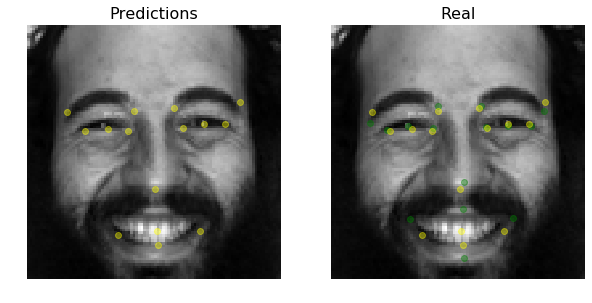

In [246]:
sample_x = x_val_norm[0, None]
sample_y = y_val[0, None]
pred = model.predict(sample_x)
show_pred(sample_x, sample_y, pred)

In [247]:
predicciones_val=model.predict(x_val_norm)
residuales_val=np.abs(predicciones_val - y_val)
mad_val=np.sum(residuales_val, axis=1)/30
# argsort는 정렬된 순서만 리턴
indices=mad_val.argsort()
indices.shape

(428,)

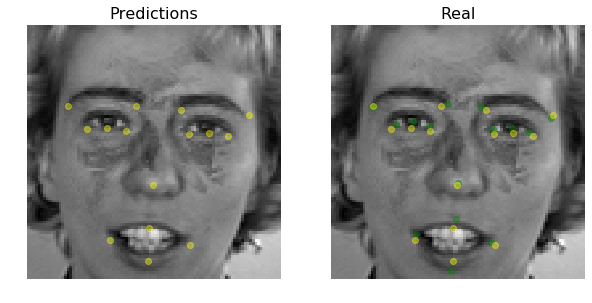

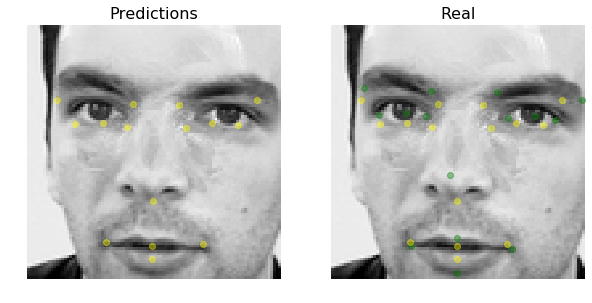

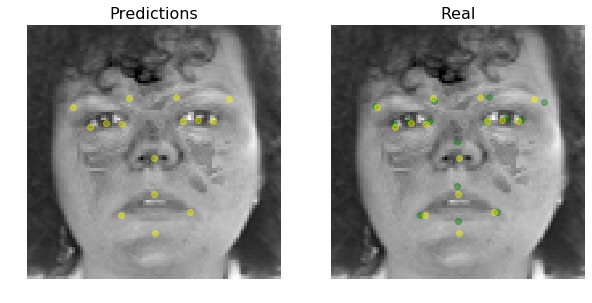

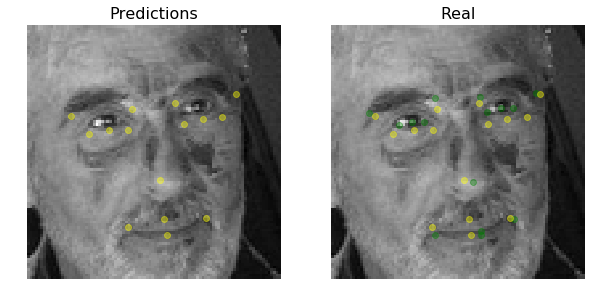

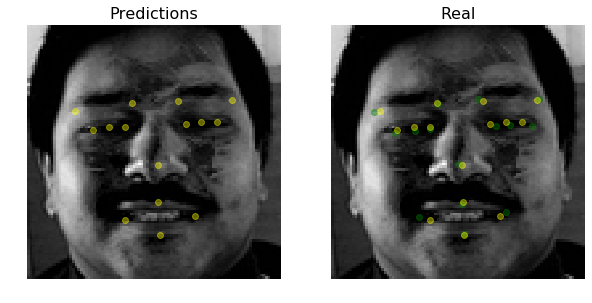

In [248]:
for _ in range(5):
    index = np.random.choice(x_val_norm.shape[0])
    sample_x = x_val_norm[index, None]
    sample_y = y_val[index, None]
    pred = model.predict(sample_x)
    show_pred(sample_x, sample_y, pred)

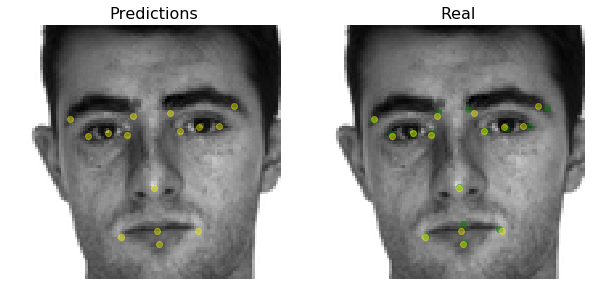

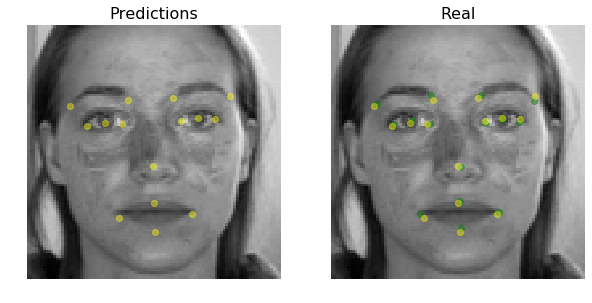

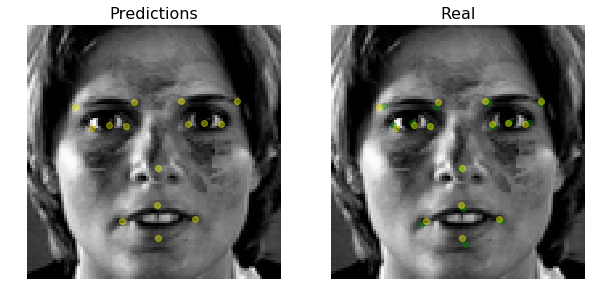

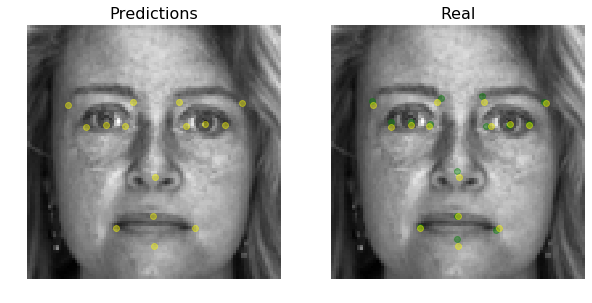

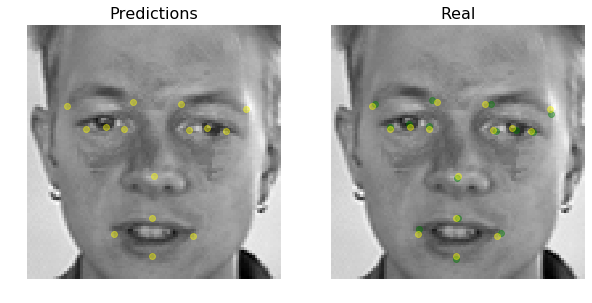

In [249]:
for i in range(5):
    sample_x = x_val_norm[indices[i], None]
    sample_y = y_val[indices[i], None]
    pred = model.predict(sample_x)
    show_pred(sample_x, sample_y, pred)